In [103]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading data in the csv file
crypto_data = pd.read_csv('crypto_data.csv', parse_dates = ['Date']).set_index('Date').dropna()
benchmark_data = pd.read_csv('benchmark_data.csv', parse_dates = ['Date']).set_index('Date').dropna()

2. A first glance at the data
Let's take a look the data to find out how many observations and variables we have at our disposal.

In [105]:
# Display summary for stock_data
crypto_data.info()
print(crypto_data.head())

# Display summary for benchmark_data
benchmark_data.info()
print(benchmark_data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-05-17 to 2020-05-15
Data columns (total 2 columns):
BTC    365 non-null float64
ETH    365 non-null float64
dtypes: float64(2)
memory usage: 8.6 KB
                    BTC         ETH
Date                               
2019-05-17  7343.895508  243.764587
2019-05-18  7271.208008  234.595230
2019-05-19  8197.689453  261.292206
2019-05-20  7978.309082  251.864410
2019-05-21  7963.327637  255.215881
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-05-17 to 2020-05-15
Data columns (total 1 columns):
S&P 500    252 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
                S&P 500
Date                   
2019-05-17  2859.530029
2019-05-20  2840.229980
2019-05-21  2864.360107
2019-05-22  2856.270020
2019-05-23  2822.239990


3. Plot & summarize daily prices for BTC and ETH
Before we compare an investment in either ETH or BTC with the index of the 500 largest companies in the US, let's visualize the data, so we better understand what we're dealing with.

,BTC,ETH
count,365.000000,365.000000
mean,8779.154455,196.113341
std,1493.603853,47.558648
min,4970.788086,110.605873
25%,7569.629883,165.101944
50%,8708.094727,186.355194
75%,9870.303711,223.522705
max,13016.231450,336.753174


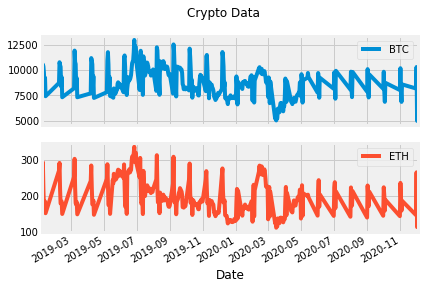

In [106]:
# visualize the stock_data
crypto_data.plot(subplots=True, title='Crypto Data');


# summarize the stock_data
crypto_data.describe()

4. Visualize & summarize daily values for the S&P 500
Let's also take a closer look at the value of the S&P 500, our benchmark.

,S&P 500
count,252.000000
mean,2982.537333
std,210.805917
min,2237.399902
25%,2878.454956
50%,2978.734986
75%,3116.649903
max,3386.149902


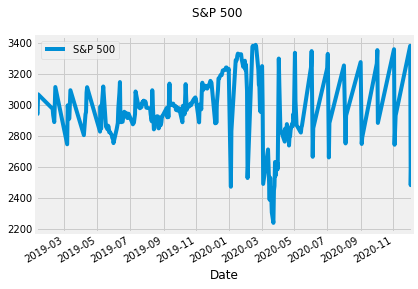

In [107]:
# plot the benchmark_data
benchmark_data.plot(subplots=True, title = 'S&P 500');


# summarize the benchmark_data
benchmark_data.describe()

5. The inputs for the Sharpe Ratio: Starting with Daily Stock Returns

The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.

However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio. Can you already guess the result?

,BTC,ETH
count,364.000000,364.000000
mean,0.001645,0.000725
std,0.043229,0.049655
min,-0.371695,-0.423472
25%,-0.016290,-0.019044
50%,-0.000332,0.000230
75%,0.020648,0.021533
max,0.181878,0.189404


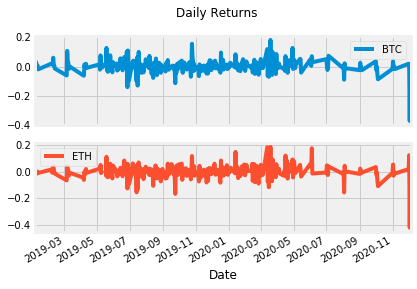

In [108]:
# calculate daily crypto_data returns
crypto_returns = crypto_data.pct_change()

# plot the daily returns
crypto_returns.plot(subplots=True, title = 'Daily Returns')


# summarize the daily returns
crypto_returns.describe()

6. Daily S&P 500 returns
For the S&P 500, calculating daily returns works just the same way, we just need to make sure we select it as a Series using single brackets [] and not as a DataFrame to facilitate the calculations in the next step.

count    251.000000
mean       0.000217
std        0.020498
min       -0.119841
25%       -0.004657
50%        0.000866
75%        0.006860
max        0.093828
Name: S&P 500, dtype: float64

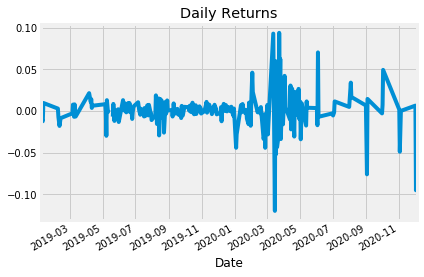

In [109]:
# calculate daily benchmark_data returns
# ... YOUR CODE FOR TASK 6 HERE ...
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot(title = 'Daily Returns')

# summarize the daily returns
sp_returns.describe()

7. Calculating Excess Returns for BTC and ETH vs. S&P 500

Next, we need to calculate the relative performance of stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between stock_returns and sp_returns for each day.

,BTC,ETH
count,251.000000,251.000000
mean,0.003358,0.001947
std,0.045127,0.049530
min,-0.276583,-0.328360
25%,-0.017944,-0.022246
50%,-0.001551,-0.000641
75%,0.023627,0.024547
max,0.177170,0.184696


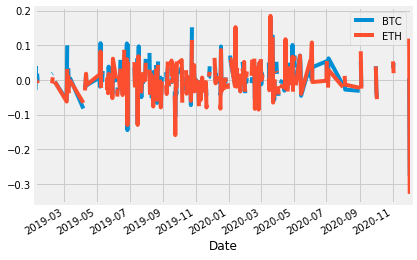

In [110]:
# calculate the difference in daily returns
excess_returns = crypto_returns.sub(sp_returns, axis=0)

# plot the excess_returns
excess_returns.plot()


# summarize the excess_returns
excess_returns.describe()

8. The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500

Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark.

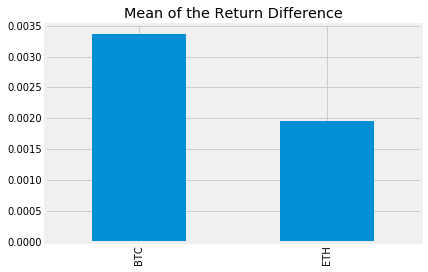

In [111]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference');

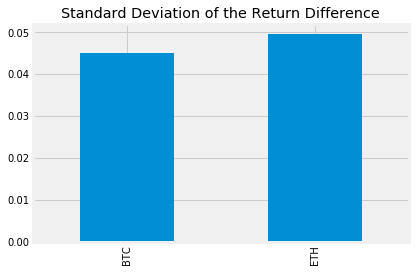

In [112]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title = 'Standard Deviation of the Return Difference');

10. Putting it all together
Now we just need to compute the ratio of avg_excess_returns and sd_excess_returns. The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.

The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252

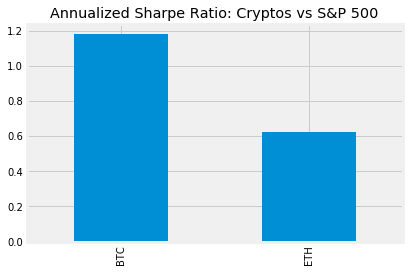

In [113]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor  = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title = 'Annualized Sharpe Ratio: Cryptos vs S&P 500');

11. Conclusion#
buy_BTC = True
buy_ETH = False

Sharpe ratio is the measure of risk adjusted return of a financial portfolio. A portflio with higher sharpe ratio is considered superior relative to its peers.

Given the two Sharpe ratios, which investment should we go for? In 2019, BTC had a Sharpe ratio twice as high as ETH. This means that an investment in BTC returned twice as much compared to the S&P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in BTC would have been more attractive.

This difference was mostly driven by differences in return rather than risk between BTC and ETH. The risk of choosing BTC over ETH (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for BTC.

When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.